In [2]:
import io
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("MovieSummaries/character.metadata.tsv", sep="\t", header=None)

In [ ]:
df = pd.DataFrame(
    np.row_stack([df.columns, df.values]),
    columns=['Wikipedia_movie_ID',
             'Freebase_movie_ID',
             'Movie_release_date',
             'Character_name',
             'Actor_DOB',
             'Actor_gender',
             'Actor_height',
             'Actor_ethnicity',
             'Actor_name',
             'Actor_age_at_movie_release',
             'Freebase_character_map',
             'Do_not_know_1',
             'Do_not_know_2'
            ]
)


#             'Movie_box_office_revenue',
 #            'Movie_runtime',
  #           'Movie_languages',
   #          'Movie_countries',
    #         'Movie_genres'

In [ ]:
moviePlots = io.open("MovieSummaries/plot_summaries.txt", encoding = 'utf8').read()

In [ ]:
moviePlots= moviePlots.split(sep='\n')

In [ ]:
len(moviePlots)

In [ ]:
movieDict = {}

for movie in moviePlots:
    words = movie.split(sep='\t')
    if(len(words) > 1):
        movieDict[words[0]] = words[1:]

In [ ]:
len(movieDict)

In [ ]:
IMDbMovies = pd.read_csv("IMDb/clean_data.tsv", sep="\t", dtype={"tconst": object, "titleType": object, "primaryTitle": object, "originalTitle": object, "isAdult": object, "startYear": object, "endYear": object, "runtimeMinutes": object, "genres": object})
IMDbMoviesFilter = IMDbMovies['titleType']=="movie"
IMDbMovies = IMDbMovies[IMDbMoviesFilter]
len(IMDbMovies)

In [ ]:
recentYears = list(map(str, range(2012,2019)))

In [ ]:
IMDbMoviesFilter = IMDbMovies['startYear'].isin(recentYears)
IMDbMovies = IMDbMovies[IMDbMoviesFilter]
len(IMDbMovies)

In [ ]:
#f = open("IMDb/clean_data.tsv", "w")

In [ ]:
#f.write("tconst	titleType \t primaryTitle \t originalTitle \t isAdult \t startYear \t endYear \t runtimeMinutes \t genres \n")

In [ ]:
#for index, row in IMDbMovies.iterrows():
#    for cols in IMDbMovies.columns:
#        f.write(row[cols] + "\t")
#    f.write("\n")

In [ ]:
#f.close()

In [3]:
title_basics = pd.read_csv("Project Data/IMDb/title_basics.tsv", sep="\t")
name_basics = pd.read_csv("Project Data/IMDb/name_basics.tsv", sep="\t")
title_principals = pd.read_csv("Project Data/IMDb/title_principals.tsv", sep="\t")

C:\Users\mads9\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
title_basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
6321297,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
6321298,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
6321299,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
6321300,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [5]:
movieTitles = {}

for movie in title_basics.get_values(): 
    if movie[1] == "movie" and movie[4] == 0:
        movieTitles[movie[0]] = [movie[2], movie[8]]

C:\Users\mads9\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
actorNames = {}

for actor in name_basics.get_values(): 
    actorNames[actor[0]] = actor[1]

C:\Users\mads9\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
actorNames['nm9993716']

'Essias Loberg'

In [8]:
movieTitles

{'tt0000009': ['Miss Jerry', 'Romance'],
 'tt0000147': ['The Corbett-Fitzsimmons Fight', 'Documentary,News,Sport'],
 'tt0000335': ['Soldiers of the Cross', 'Biography,Drama'],
 'tt0000502': ['Bohemios', '\\N'],
 'tt0000574': ['The Story of the Kelly Gang', 'Biography,Crime,Drama'],
 'tt0000615': ['Robbery Under Arms', 'Drama'],
 'tt0000630': ['Hamlet', 'Drama'],
 'tt0000675': ['Don Quijote', 'Drama'],
 'tt0000676': ['Don Álvaro o la fuerza del sino', 'Drama'],
 'tt0000679': ['The Fairylogue and Radio-Plays', 'Adventure,Fantasy'],
 'tt0000739': ['El pastorcito de Torrente', 'Drama'],
 'tt0000793': ['Andreas Hofer', 'Drama'],
 'tt0000812': ['El blocao Velarde', '\\N'],
 'tt0000814': ['La bocana de Mar Chica', '\\N'],
 'tt0000838': ['A Cultura do Cacau', '\\N'],
 'tt0000842': ['De Garraf a Barcelona', '\\N'],
 'tt0000846': ['Un día en Xochimilco', '\\N'],
 'tt0000850': ['Los dos hermanos', '\\N'],
 'tt0000859': ['Fabricación del corcho en Sant Feliu de Guixols', '\\N'],
 'tt0000862': ['Fa

In [9]:
len(movieTitles)

527345

In [29]:
movieTitles

{'tt0000009': ['Miss Jerry', 'Romance'],
 'tt0000147': ['The Corbett-Fitzsimmons Fight', 'Documentary,News,Sport'],
 'tt0000335': ['Soldiers of the Cross', 'Biography,Drama'],
 'tt0000502': ['Bohemios', '\\N'],
 'tt0000574': ['The Story of the Kelly Gang', 'Biography,Crime,Drama'],
 'tt0000615': ['Robbery Under Arms', 'Drama'],
 'tt0000630': ['Hamlet', 'Drama'],
 'tt0000675': ['Don Quijote', 'Drama'],
 'tt0000676': ['Don Álvaro o la fuerza del sino', 'Drama'],
 'tt0000679': ['The Fairylogue and Radio-Plays', 'Adventure,Fantasy'],
 'tt0000739': ['El pastorcito de Torrente', 'Drama'],
 'tt0000793': ['Andreas Hofer', 'Drama'],
 'tt0000812': ['El blocao Velarde', '\\N'],
 'tt0000814': ['La bocana de Mar Chica', '\\N'],
 'tt0000838': ['A Cultura do Cacau', '\\N'],
 'tt0000842': ['De Garraf a Barcelona', '\\N'],
 'tt0000846': ['Un día en Xochimilco', '\\N'],
 'tt0000850': ['Los dos hermanos', '\\N'],
 'tt0000859': ['Fabricación del corcho en Sant Feliu de Guixols', '\\N'],
 'tt0000862': ['Fa

In [10]:
movie_AndActors = {}

for combo in title_principals.get_values(): 
    if combo[3] == "actor" or combo[3] == "actress" :
        #print(combo[5])
        if combo[2] in actorNames.keys():
            name = actorNames[combo[2]]
        else:
            continue

        if combo[0] in movieTitles.keys():
            movie = movieTitles[combo[0]][0]
        else:
            continue

       # movie = movieTitles[combo[0]][0]
        genres = movieTitles[combo[0]][1]
        
        if name in movie_AndActors.keys():
            movie_AndActors[name].append(combo[0])
        else:
            movie_AndActors[name] = [combo[0]]

C:\Users\mads9\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
movie_AndActors

{'Blanche Bayliss': ['tt0000009'],
 'William Courtenay': ['tt0000009',
  'tt0006014',
  'tt0006873',
  'tt0007129',
  'tt0008127',
  'tt0008158',
  'tt0008501',
  'tt0019859',
  'tt0020355',
  'tt0020403',
  'tt0145443'],
 'Chauncey Depew': ['tt0000009'],
 'Beatrice Day': ['tt0000335', 'tt0189984'],
 'Harold Graham': ['tt0000335'],
 'Mr. Graham': ['tt0000335'],
 'John Jones': ['tt0000335', 'tt1365637', 'tt5614276'],
 'Orrie Perry': ['tt0000335'],
 'Reg Perry': ['tt0000335'],
 'Antonio del Pozo': ['tt0000502'],
 'El Mochuelo': ['tt0000502'],
 'Elizabeth Tait': ['tt0000574'],
 'John Tait': ['tt0000574'],
 'Norman Campbell': ['tt0000574'],
 'Bella Cola': ['tt0000574'],
 'Jim Gerald': ['tt0000615', 'tt0134787'],
 'George Merriman': ['tt0000615'],
 'Lance Vane': ['tt0000615', 'tt0134787'],
 'William Duff': ['tt0000615'],
 'Arthur Guest': ['tt0000615'],
 'Rhoda Dendron': ['tt0000615'],
 'Fernanda Negri Pouget': ['tt0000630',
  'tt0003489',
  'tt0126353',
  'tt0173822',
  'tt0175659',
  'tt01

In [12]:
len(movie_AndActors)

550375

In [27]:
filename = "movie_titles_clean.tsv"
f = open(filename, "a", encoding="utf-8")

f.write("tconst \t title \t genres \n")

for m in movieTitles:
    #print(m)
    #print(movieTitles[m])
    #break
    
    f.write(m + "\t" + movieTitles[m][0] + "\t" + movieTitles[m][1] + "\n")

f.close()

In [45]:
filename = "movie_and_actors_clean.tsv"
f = open(filename, "a", encoding="utf-8")

f.write("name \t tconst(s) \n")

for m in movie_AndActors:
    #print(m)
    #print(movie_AndActors[m])
    #break
    
    s = m + "\t"
    
    for t in movie_AndActors[m]:
        
        s = s + t + ","
    
    f.write(s[:-1] + "\n")

f.close()

In [70]:
import networkx as nx
import matplotlib.pyplot as plt

In [71]:
G = nx.Graph()

In [72]:
for m in movieTitles:
    G.add_node(m, title=movieTitles[m][0], genres=movieTitles[m][1])

In [73]:
for a in movie_AndActors.keys():
    movies = movie_AndActors[a]
    for i in range(len(movies)):
        for j in range(i+1,len(movies)):
            G.add_edge(movies[i],movies[j])

In [74]:
G.number_of_nodes()

527345

In [75]:
G.number_of_edges()

19461220

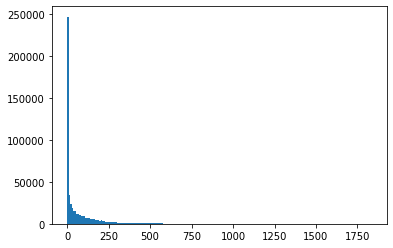

In [76]:
degrees = [G.degree(n) for n in G.nodes()]

plt.hist(degrees,bins=200)
plt.show()
plt.close()

In [77]:
for n in G.nodes():
    if (G.degree(n) > 700):
        print(G.node[n]['title'], " ", G.degree(n))

Chûshingura - Zempen: Akahokyô no maki   701
Aru yo no tonosama   927
Abe Hayat   777
Anarkali   738
Jashan   732
Kundan   718
Naya Andaz   782
Aasha   892
Nau Do Gyarah   782
Kala Aadmi   753
Raja Bhakti   971
Abasheshe   717
Dr. Vidya   799
Gumrah   765
Baghi   936
Benazir   919
Kohraa   723
Phoolon Ki Sej   1146
Zindagi   798
Chand Aur Suraj   820
Naya Kanoon   745
Anarkali   1166
Chitra Mela   763
Mehrban   746
Bhai Bahen   809
Jwala   990
Pyar Hi Pyar   844
Blood of the Vampires   828
Beast of the Yellow Night   706
Naya Zamana   740
Prema Nagar   833
Tubog sa ginto   705
Anuraag   903
Bombay to Goa   701
Garam Masala   751
Sanjog   978
Swayamvaram   1012
Yeh Gulistan Hamara   858
Zameen Aasmaan   791
Gehri Chaal   1004
Jugnu   781
Uttarayanam   859
Nehle Pe Dehla   787
Agni Nakshatram   711
Aradhana   1030
Ek Hi Raasta   865
Gyaniji   705
Ladki Jawan Ho Gayi   946
Besharam   855
Ram Kasam   703
Vidhyarthigale Ithile Ithile   1376
Ahinsa   771
Cheriyachante Kroora Krithyangal   70

Lava Kusa   819
Palletoori Pilla   720
Yamagola   751
Ek Raaz   1007
Hindustan Ki Kasam   702
Meng mian da xia   708
Kursun yolu   726
Bhagyalaxmi   837
Moti Mahal   717
Road to Sikkim   796
Aadarsa Kutumbam   959
Adimagal   723
Agniputhri   810
Ammakosam   790
Ashwamedham   1121
Asuravithu   928
Bhargavi Nilayam   770
Chale Hain Sasural   841
Deeksha   796
Ek Saal Pehle   704
Kavya Mela   908
Kohram   730
Kottayam Kola Case   1009
Kunjali Marakkar   1033
Lal Americayil   1029
Mahasati Anusuya   812
Main Aur Mera Bhai   942
Manashulu Mamatalu   823
Manchi Manishi   715
Murappennu   936
Ninamaninja Kaalpaadukal   929
Odeyil Ninnu   1097
Oonchi Haveli   796
Padaiyappa   1123
Palletoori Bava   941
Rosy   808
Shuk Rambha   900
Teri Meri Ik Jindri   924
Thirichadi   932
Thulabharam   898
Visappinte Vili   781
Adhipathyam   1624
Anubhavangal Palichakal   707
Aniyathi   801
Aranazhikaneram   981
Atmarpanam   892
Attakkalasam   1063
Avakashi   779
Avalum Penn Thaane   762
Avar Unarunnu   824
A

Anmol Moti   859
Annaiyin Aanai   999
Do Ustad   887
Kismatwala   797
Naan Valartha Thangai   724
Sagaai   716
Aa Divasom   1138
Ahimsa   830
Anaganaga Oka Roju   962
Apna Bana Lo   831
Kanavan   711
Khudgarz   762
Mattukkara Velan   767
Netru Indru Nalai   1083
Oru Thai Makkal   877
Raman Thediya Seethai   977
Sangey Muzhangu   822
Veedu   879
Aparan   1275
Arappatta Kettiya Graamathil   1241
Kallan Pavithran   865
Kariyila Kattu Pole   780
Mutyamantha Muddu   997
Thinkalazhcha Nalla Divasam   727
Pelli Koduku   959
Ish Gup Chup   1243
Vivaaha Bhojanambu   1092
420   1079
Baap Bete   940
Badi Panthulu   716
Chitram Bhalare Vichitram   854
Daanveer Karna   970
Dil Tera Diwana   722
Ezhupunna Tharakan   932
Kappalottiya Thamizhan   798
Karnan   793
Murudan Muthu   1068
Saku Magalu   778
Stalin Sivadas   821
Swathi   879
Thangamalai Ragasyam   991
Veerapandiya Kattabomman   775
Gundagardi   874
Shapath   1086
Ethirum Puthirum   1119
Golanthara Vartha   851
Linga Babu Love Story   1234
Me

Top Hero   1010
Visa   1054
Yamaleela   1173
Aana Paachan   943
Anurodh   717
Ashoka Vanam   1213
Avakaasham   716
Avar Jeevikkunnu   860
Awaaz   1060
Ayaash   1012
Baghavat   740
Bharyayum Kamukiyum   1206
Dushman   930
Hemanda Rathri   816
Hum Se Hai Zamana   792
Inspector   907
Ithanente Vazhi   838
Jayikkanaayi Janichavan   1147
Kalpa Vriksham   1112
Kanal Kattakal   1114
Kanyaka   1238
Lucky Chance   797
Madhurikkunna Rathri   717
Mattoru Karnan   805
Midukki Ponnamma   796
Mudhra Mothiram   1072
Mukkuvane Snehicha Bhootham   848
Ninakku Njanum Enikku Neeyum   1095
Nivedhyam   1065
Paadasaram   840
Padakuthira   740
Pakhandi   821
Prarthana   953
Prem Bandhan   750
Raju Rahim   800
Reghu Vamsam   1183
Rowdy Ramu   763
Sathru Samharam   1164
Seemanthini   821
Sheroo   702
Society Lady   1128
Sundharimarude Swapnangal   976
Urakkom Varaatha Rathrikal   778
Vayanadan Thampan   789
Aalkkoottathil Thaniye   1002
Aarorumariyathe   930
Aattuvanchi Ulanjappol   918
Akkare   742
Alakadalin

Samasya   973
Swimming Pool   1085
Yudha Bhoomi   1188
Achani   1146
Anubhavam   1240
Hello Darling   990
Pongi Varum Kaveri   713
Punarjanmam   844
Ward No. 7   1393
Kalam Kaathu Ninnilla   956
Chandralekha   762
Varnapakittu   751
Maa Nannaki Pelli   760
Anbalipu   1248
Andru Kanda Mugam   862
Arunodaya   881
Bommalattam   844
Deviga Uravu   702
En Thambi   851
Galatta Kalyanam   962
Jeevanamsam   1047
Kahin Din Kahin Raat   802
Moondru Yezhuthu   952
Nalum Therindavan   1063
Bôgyaku onna gômon   717
Aakrosam   1035
Abhayam Thedi   1030
Adhipan   885
Adiverukal   836
Agnidevan   809
Anuragi   886
Appunni   766
Attimari   819
Aduthaduthu   853
Ayitham   1246
Boomiyile Rajakkanmar   1133
Devasuram   778
Douthyam   718
Druvasangamam   855
Enikkum Oru Divosam   1376
Ente Entethu Mathram   1056
Ivide Thudangunnu   1245
Irupatham Noottandu   1125
Ivide Ellavarkkum Sugham   1244
Kalippattam   1171
Kaliya Mardanam   1074
Kaliyil Alpam Karyam   1285
Kayyethum Doorathu   778
Kilikonchal   919


Sati Savitri   1088
Sau Din Saas Ke   796
Shiv Kanya   804
Taga sa bato   853
Tanikalang apoy   745
Tasveer   807
Yathrakarude Sradhakku   756
Aisa Pyaar Kahan   996
Apna Khoon   872
Badi Bahen   913
Big J   703
Bondying   839
Chanti   1128
Dafaa 302: Indian Penal Code Section 302 (Section of Murder)   860
Ek Aur Ek Gyarah   793
Elaan-E-Jung   735
Gharana   820
Ghazab   718
Hiram na mukha   753
Hostage... Hanapin si Batuigas!   757
Hum Se Na Takrana   820
Insaaf Kaun Karega   767
Isang ama, dalawang ina   888
Kali Basti   714
Ang kampana sa Santa Quiteria   798
Kanoon Ki Zanjeer   970
Kartavya   1164
Lumuha pati mga anghel   897
Mar Mitenge   755
Masikip maluwang paraisong parisukat   837
Mera Faisla   1023
Nardong Putik   730
Nueva Viscaya   774
Phool Khile Hain Gulshan Gulshan   910
Qatil   758
Raaste Pyar Ke   774
Rakta Bandhan   886
Suntan   816
Sawan Ke Geet   827
Sher Dil   712
Sindoor   887
Swandam Sharika   1054
Tatlong kasalanan   716
Triveni   772
Yugandhar   817
Brilliant So

Badong Baldado   766
Bir atesim yanarim   703
Hindi ka na sisikatan ng araw: Kapag puno na ang salop Part III   795
Kapag puno na ang salop   1067
Shubh Kaamna   844
Apat ang anak ni David   909
Dancing Master   820
Lasing Master   877
The Quick Brown Fox   900
Sa akin pa rin ang bukas   780
Tatlong patak ng dugo ni Adan   766
Gulo kung gulo   1017
Kitang-kita ang ebidensiya   905
The Armless Hero   980
Tulak ng bibig, kabig ng dibdib   720
Utos ni mayor   818
Ibong lukaret   714
Ikaw lamang   842
Phantom Lady   779
Mga reynang walang trono   1151
Seni bekleyecegim   703
Mga Tigre ng Sierra Cruz   981
Vilma veinte nueve   864
Vivian Volta   1346
Kaalia   1073
Marine Drive   703
Anak sa una, kasal sa ina   1127
Chabacano   712
Lost Love   755
Get My Son Dead or Alive   893
Kaming makasalanan   730
Mano po III: My Love   843
Si mister at si misis   780
The Ruby-Eyed Cat   722
Palay Khan   840
Piarin guwolsan   713
Kadhavaseshan   822
Heera-Moti   723
Karamdaata   744
Batas sa aking kamay

Ang pagbabalik ni Harabas at Bulilit   781
Tembong   791
Shazam boom   736
Babae!   805
Awat na, Asiong Aksaya!   752
Krishna: The Power of Indrakeeladri   925
Ang Pinakamagandang Hayop sa Daigdig   710
Zahreela   742
Anak ng araw   804
Leap year ngayon, lagot ka pipikutin kita   811
Kapag buhay ang inutang   1041
Ang babaeng Isputnik   746
Batang Matadero   784
Nardong kutsero   784
Baskin   817
Omar Cassidy and the Sandalyas Kid   770
Our Man Duling   754
Panagupa   721
Sangre   727
Begaana   838
Angelito negro   870
Bimbo   977
Guadalupe   843
Madonna   880
The Magnificent Ifugao   703
San Cristobal   725
Iligpit si pretty boy   826
Puga   743
Usigin ang maysala   877
Dirty Hari   805
Limang kidlat   876
Ponso Villa and the Sexy Mexicanas   870
Trubador   816
Gorio... kahapon, ngayon at bukas   885
Sto. Cristo   1341
Halik ng Vampira   798
Pagsapit ng dilim   731
Tanikalang dugo   857
Kotha Bangaru Lokam   1210
Adhipathi   755
Assembly Rowdy   1062
Brahma   1026
Chitemma Mogudu   12

Pattukondi Chuddam   1030
Sambahin ang ngalan mo   785
Abbaigaru   1177
Akkum Bakkum   965
Akka Bhagunavaa   1045
Akka Chellalu   882
Allariodu   948
Amma   1049
Amma Ammani Chudalani Undhi   935
Amma Nanna Kavali   1002
Ammaleni Puttinellu   955
Ammo Alludu   802
Artha Nadham   851
Athma Bandham   882
Ayyappa Deeksha Mahimalu   935
Bangaru Bullodu   1256
Bobbili Bolludu   839
Bobbili Simham   1632
Bombayi Priyudu   1058
Bumper Offer   1123
Champion   804
College Student   969
Dabbu Bale Jabbu   868
Dhadhar Express   805
Doshi Nirdoshi   882
Evaraina Eppudaina   1038
Ganesh   934
Gouramma Nee Mogudevaramma   805
Gunshot   1170
Hello Guru   964
Inspector Aswini   799
Intlo Illalu Vantaintlo Priyuralu   1018
Jabiliamma Pelli   908
Jagadeka Veerudu   1069
Jayanbhu Neschayambhura   1021
Jayeebhava   1110
Joker Mama Super Alludu   839
Kankana Baghya   805
Kannaya-Kittaya   1020
Kongu Chatu Krishnudu   1087
Kranthi   809
Kurolla Rajyam   1018
Leader   897
Maa Inti Adapaduchu   856
Maga Rayud

The Enemy   1081
Alyas Blackie   734
Cyrano at Roxanne   1094
Logro diyes   782
Aha Naa Pellanta   878
Black Kung Fu   863
Bandila ng magigiting   955
Angkan ni watari   793
Sanctuario   861
Hepe: ...Isasabay kita sa paglubog ng araw   736
Durugin ang mga diyablo sa punta fuego   1190
Kill RP Nine-O   725
Red Belt Master   869
25 Taong takas   1046
Dial 717   748
Magnum 44   844
Metrocom   817
Missha! Kinbaku gômon   711
The Partnership   826
Bornebol: Special Agent   768
Kill ... The Carnapers   1177
Snehaveedu   830
Doctor, Doctor I Am Sick!   749
Duwag ... lumaban ka!   742
May lalaki sa ilalim ng kama ko   738
San Simeon   1037
Misshitsuhen Taichôkyô   894
Ito'y isang baliw na baliw na daigdig   788
Babae hindi ka dapat nilalang   916
The Magnificient Brute   797
Ako ang nagbayo, nagsaing, iba ang kumain   824
Harabas Is My Name   837
Mababagsik na anghel   898
Prrrt... huli ka anong say mo?   888
Sa ibabaw ng lahat   760
Ang kailangan ngayon ng daigdid ay pag-ibig   937
Isinumpa  

Veer Eklavya   864
Heeron Ka Chor   930
Walang Patawad!   817
Dil Churaya Apne   731
Cinema Chupista Maava   848
Hinahamon Kita   784
Rancho Bravo   860
Pyar Ki Ladai   933
Matapang sa Matapang   808
Magasal Ka Na!   759
Rough Tuff   803
Akhil   918
Swami Ayappa Shabarimalai   707
Mapusok na Paghihiganti   723
Huk Hunter   817
Hanapin si... Jake Romano   754
The Fastest Gun Alive of WPD   918
Porontoy   803
Sanggang dikit   747
Kumander Ahmed Kalansalay   824
Duelo Sa Puting Buhangin   708
Baliw O Martir   999
Operasyong Bayong   861
Markang Demonyo   949
Nayaki   930
Pagtutuos ng mga Kilabot   716
Pitong makasalanan   829
14   938
Dolpe de Gulat   783
Dugong Kayumanggi   935
Callejon 11   874
Babloo   956
Fando   756
Ginintuang Kamay   709
Sa Bawa't Hakbang... Panganib   812
Ang Alamat ni Zaldo   861
Ang Salarin   739
Tierra Verde   879
Bilis ng Kamay   865
Shraddha: In the Name of God   735
Ang Pinakakilabot   910
Hum To Ho Gayi Ni Tohar   732
Janam Janam Ke Saath   788
Hare Rama Har

In [ ]:
nx.draw(G)
plt.show()
plt.close()